## Amit Bharucha(2003304)

#Kernel_PCA for image represntation

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


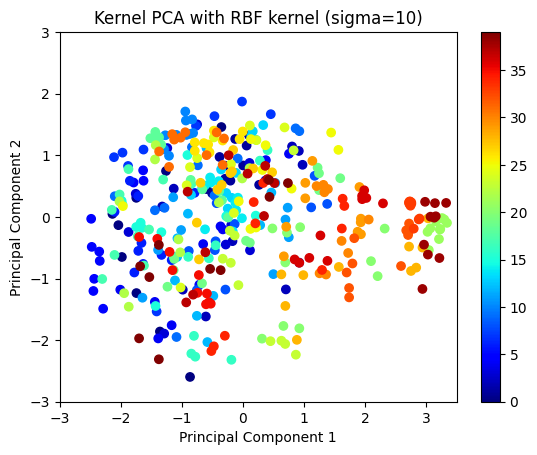

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import KernelPCA
from sklearn.datasets import fetch_olivetti_faces
from PIL import Image

# Load the olivetti faces Dataset
data = fetch_olivetti_faces()
X = data['data']
y = data['target']

def kernel_matrix(X, kernel_type='rbf', sigma=None, degree=None):
    n = X.shape[0]
    K = np.zeros((n, n))

    if kernel_type == 'linear':
        K = np.dot(X, X.T)
    elif kernel_type == 'poly':
        if degree is None:
            degree = 2
        K = (np.dot(X, X.T) + 1) ** degree
    elif kernel_type == 'rbf':
        if sigma is None:
            sigma = 1
        for i in range(n):
            for j in range(i, n):
                d = np.linalg.norm(X[i] - X[j])
                K[i, j] = np.exp(-d ** 2 / (2 * sigma ** 2))    # K(x,x')=e^(-||x-x'||^2 / 2*sigma^2)
                K[j, i] = K[i, j]
    else:
        raise ValueError('Invalid kernel type')

    return K

def kernel_pca(X, n_components, kernel_type='rbf', sigma=None, degree=None):
    n = X.shape[0]

    # Compute the kernel matrix
    K = kernel_matrix(X, kernel_type=kernel_type, sigma=sigma, degree=degree)

    # Center the kernel matrix
    one_n = np.ones((n, n)) / n
    K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Compute the eigenvalues and eigenvectors of the centered kernel matrix
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)

    # Sort the eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Select the top n_components eigenvectors as the principal components
    principal_components = eigenvectors[:, :n_components]

    # Compute the projection of the data onto the principal components
    projection = K_centered.dot(principal_components)

    return projection, principal_components

# Perform kernel PCA with RBF kernel and 50 components
n_components = 50
projection, principal_components = kernel_pca(X, n_components, kernel_type='rbf', sigma=10)

# Plot the first two principal components
plt.scatter(projection[:, 0], projection[:, 1], c=y, cmap='jet')
plt.colorbar()
plt.title('Kernel PCA with RBF kernel (sigma=10)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set the x and y axis limits
plt.xlim([-3, 3.5])
plt.ylim([-3, 3])

plt.show()


This plot shows all 400 images(40 people 10 images each)

#Plot for just one person

(-3.0, 3.0)

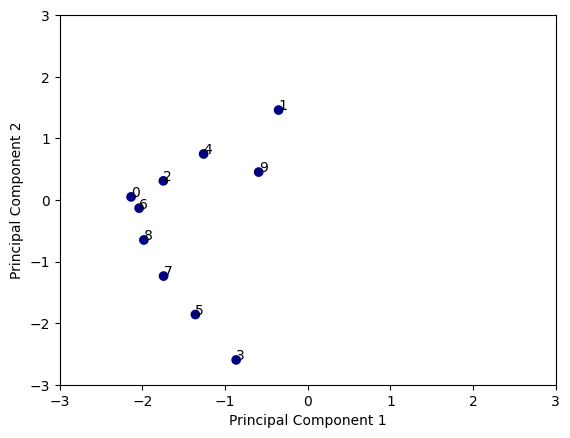

In [ ]:
# Plot the first two principal components
plt.scatter(projection[:10, 0], projection[:10, 1], c=y[:10], cmap='jet')
for i in range(10):
  plt.annotate(str(i),xy=(projection[i][0],projection[i][1]) )
#plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set the x and y axis limits
plt.xlim([-3, 3])
plt.ylim([-3, 3])

#plt.show()

#Y-Axis



(-3.0, 3.0)

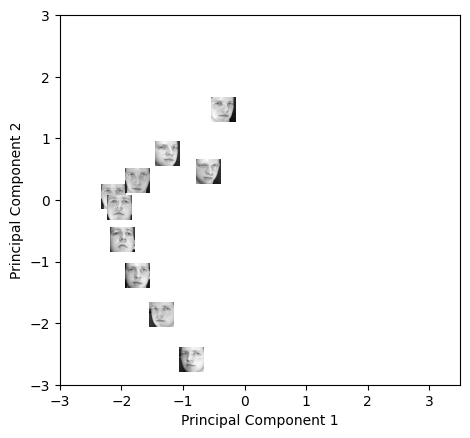

In [ ]:
for i in range(10):
  a=i
  img_len=0.200
  image = data.images[a]
  plt.imshow(image,cmap='gray', extent=(projection[a][0]  - img_len, projection[a][0]  + img_len, projection[a][1]  - img_len, projection[a][1]  + img_len))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set the x and y axis limits
plt.xlim([-3, 3.5])
plt.ylim([-3, 3])

These are all the photos of 1st person. Here we can observe that by moving top to down, angle of the camera changes fom left to right

#X-Axis

(-3.0, 3.0)

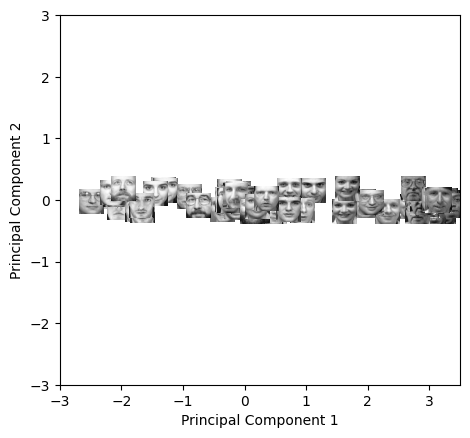

In [ ]:
for i in range(400):
  if(projection[i][1]<(-.2) or projection[i][1]>.2):
    continue
  a=i
  img_len=0.200
  image = data.images[a]
  plt.imshow(image,cmap='gray', extent=(projection[a][0]  - img_len, projection[a][0]  + img_len, projection[a][1]  - img_len, projection[a][1]  + img_len))

#plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set the x and y axis limits
plt.xlim([-3, 3.5])
plt.ylim([-3, 3])


#plt.show()

Here we can see that images gets darker if we move along x axis. That is Light of the Image decreases